In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr, chi2_contingency
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm 

In [2]:
anime = pd.read_csv(r'C:\Users\tyler\Downloads\titles.csv')
credits = pd.read_csv(r"C:\Users\tyler\Downloads\credits.csv")
print(anime.head())
columns = anime.columns
print(columns)

        id                      title  type  \
0  ts21930            Lupin the Third  SHOW   
1  ts25177         Mobile Suit Gundam  SHOW   
2  ts35087         Galaxy Express 999  SHOW   
3  ts82387              Lupin the 3rd  SHOW   
4   ts2846  Chōdenji Machine Voltes V  SHOW   

                                         description  release_year  \
0  Arsene Lupin III is the grandson of the master...          1971   
1  Mobile Suit Gundam is a televised anime series...          1979   
2  Galaxy Express 999 is a manga written and draw...          1978   
3  The master thief Lupin III and his cronies con...          1977   
4  Chōdenji Machine Voltes V is a Japanese anime ...          1977   

  age_certification  runtime  \
0             TV-14       23   
1             TV-Y7       25   
2             TV-PG       24   
3             TV-14       24   
4             TV-PG       24   

                                              genres production_countries  \
0  ['scifi', 'animation', 

In [3]:
print(anime.dtypes)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


In [4]:
def action_indicator(x): 
    if 'action' in x: 
        return 1
    else: 
        return 0 
def adventure_indicator(x): 
    if 'adventure' in x:
        return 1
    else: 
        return 0 
    
def comedy_indicator(x): 
    if 'comedy' in x: 
        return 1
    else:
        return 0 

def crime_indicator(x): 
    if 'crime' in x: 
        return 1
    else: 
        return 0

def drama_indicator(x):
    if 'drama' in x: 
        return 1
    else:
        return 0

def family_indicator(x): 
    if 'family' in x: 
        return 1
    else: 
        return 0
    
def fantasy_indicator(x): 
    if 'fantasy' in x: 
        return 1
    else:
        return 0
    
def historical_indicator(x): 
    if 'history' in x: 
        return 1
    else: 
        return 0 
    
def horror_indicator(x): 
    if 'horror' in x: 
        return 1
    else: 
        return 0     

def romance_indicator(x): 
    if 'romance' in x: 
        return 1
    else: 
        return 0 

def science_fiction_indicator(x): 
    if 'scifi' in x: 
        return 1 
    else:
        return 0 
    
def sports_indicator(x): 
    if 'sport' in x: 
        return 1 
    else: 
        return 0 
    
def thriller_indicator(x): 
    if 'thriller' in x: 
        return 1
    else: 
        return 0 

def western_indicator(x):
    if 'western' in x:
        return 1
    else:
        return 0

anime['Action'] = anime.genres.apply(func = action_indicator)
anime['Comedy'] = anime.genres.apply(func = comedy_indicator)
anime['Crime'] = anime.genres.apply(func = crime_indicator)
anime['Family'] = anime.genres.apply(func = family_indicator)
anime['Fantasy'] = anime.genres.apply(func = fantasy_indicator)
anime['Horror'] = anime.genres.apply(func = horror_indicator)
anime['Romance'] = anime.genres.apply(func = romance_indicator)
anime['Science Fiction'] = anime.genres.apply(func = science_fiction_indicator)
anime['Sports'] = anime.genres.apply(func = sports_indicator)
anime['Thriller'] = anime.genres.apply(func = thriller_indicator)
anime['Western'] = anime.genres.apply(func = western_indicator)

print(anime.Action.sum())
print(anime.Comedy.sum())
print(anime.Crime.sum())
print(anime.Family.sum())
print(anime.Fantasy.sum())
print(anime.Horror.sum())
print(anime.Romance.sum())
print(anime.Sports.sum())
print(anime.Thriller.sum())
print(anime.Western.sum())

463
567
31
35
353
49
253
55
90
4


In [5]:
age_ratings = pd.get_dummies(anime.age_certification)
anime = pd.concat([anime, age_ratings], ignore_index = False, axis = 1)
print(anime)
print(anime.columns)

            id                            title  type  \
0      ts21930                  Lupin the Third  SHOW   
1      ts25177               Mobile Suit Gundam  SHOW   
2      ts35087               Galaxy Express 999  SHOW   
3      ts82387                    Lupin the 3rd  SHOW   
4       ts2846        Chōdenji Machine Voltes V  SHOW   
...        ...                              ...   ...   
1076  ts252949         Farewell, My Dear Cramer  SHOW   
1077  ts267874  I★Chu: Halfway Through the Idol  SHOW   
1078  ts268254             ABCiee Working Diary  SHOW   
1079  ts285889       GLOOMY The Naughty Grizzly  SHOW   
1080  ts255190                          Idolls!  SHOW   

                                            description  release_year  \
0     Arsene Lupin III is the grandson of the master...          1971   
1     Mobile Suit Gundam is a televised anime series...          1979   
2     Galaxy Express 999 is a manga written and draw...          1978   
3     The master thief 

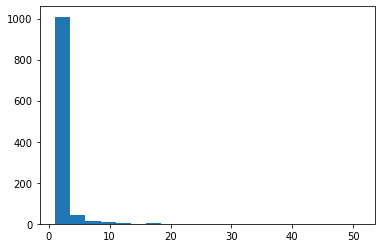

count    1080.000000
mean        1.725926
std         2.345282
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        51.000000
Name: seasons, dtype: float64

<Figure size 432x288 with 0 Axes>

In [6]:
plt.hist(anime.seasons, bins = 20)
plt.show()
plt.clf()

anime.seasons.describe()

In [7]:
print(anime.imdb_score.isna().sum())
anime.dropna(subset = ['imdb_score'], axis = 0, inplace = True)

174


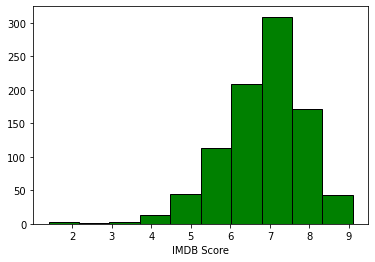

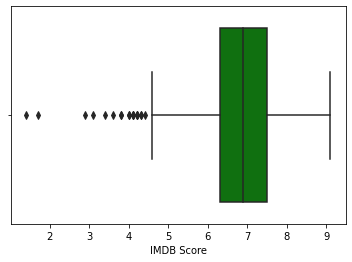

count    907.000000
mean       6.830650
std        1.012411
min        1.400000
25%        6.300000
50%        6.900000
75%        7.500000
max        9.100000
Name: imdb_score, dtype: float64


<Figure size 432x288 with 0 Axes>

In [8]:
plt.hist(anime.imdb_score, color = 'green', edgecolor = 'black')
plt.xlabel('IMDB Score')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score, color = 'green')
plt.xlabel('IMDB Score')
plt.show()
plt.clf()

print(anime.imdb_score.describe())

In [9]:
print(anime.imdb_votes.isna().sum())
anime.dropna(subset = ['imdb_votes'], axis = 0, inplace = True)

0


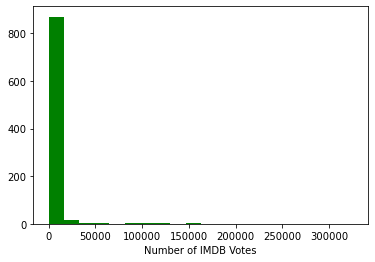

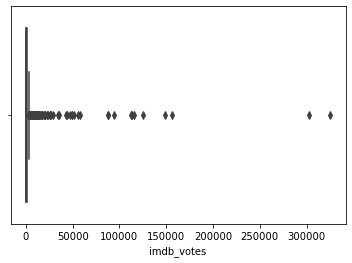

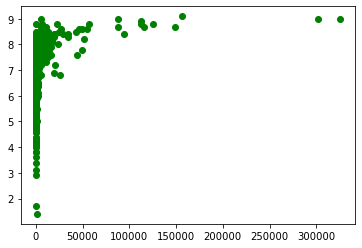

In [10]:
plt.hist(anime.imdb_votes, color = 'green', bins = 20)
plt.xlabel('Number of IMDB Votes')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_votes)
plt.show()
plt.clf()

plt.scatter(anime.imdb_votes, anime.imdb_score, color = 'green')

In [11]:
print(anime.seasons.isna().sum())
anime.dropna(subset = ['seasons'], axis = 0, inplace = True)

1


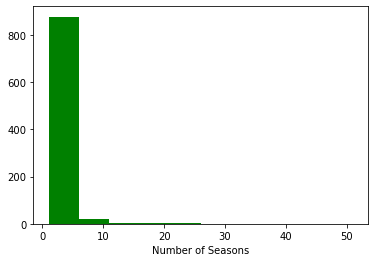

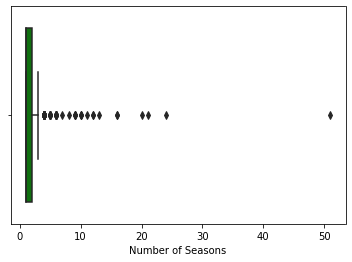

<Figure size 432x288 with 0 Axes>

In [12]:
median_seasons = anime.seasons.median()
average_seasons = anime.seasons.mean()
min_seasons = anime.seasons.mean()
max_seasons = anime.seasons.max()

plt.hist(anime.seasons, color = 'green')
plt.xlabel('Number of Seasons')
plt.show()
plt.clf()

sns.boxplot(x = anime.seasons, color = 'green')
plt.xlabel('Number of Seasons')
plt.show()
plt.clf()

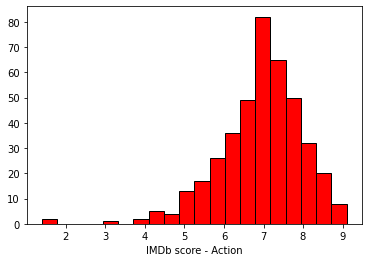

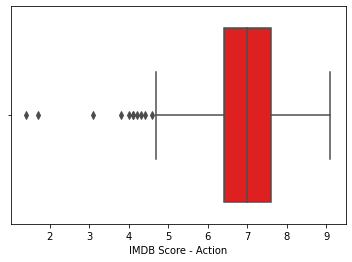

count    412.000000
mean       6.924272
std        1.049293
min        1.400000
25%        6.400000
50%        7.000000
75%        7.600000
max        9.100000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [13]:
plt.hist(anime.imdb_score[anime.Action == 1], color = 'red', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb score - Action')
plt.show()
plt.clf()


sns.boxplot(x = anime.imdb_score[anime.Action == 1], color = 'red')
plt.xlabel('IMDB Score - Action')
plt.show()
plt.clf()
anime.imdb_score[anime.Action == 1].describe()

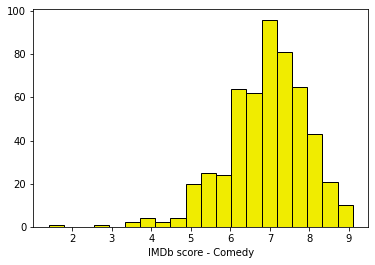

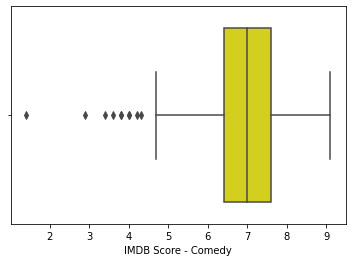

count    525.000000
mean       6.903619
std        1.012124
min        1.400000
25%        6.400000
50%        7.000000
75%        7.600000
max        9.100000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [14]:
plt.hist(anime.imdb_score[anime.Comedy == 1], color = '#F0EC00', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb score - Comedy')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime.Comedy == 1], color = '#F0EC00')
plt.xlabel('IMDB Score - Comedy')
plt.show()
plt.clf()

anime.imdb_score[anime.Comedy == 1].describe()

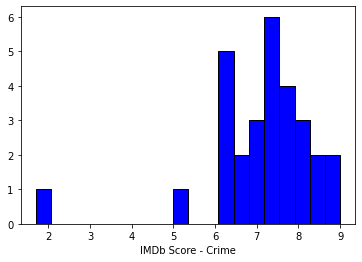

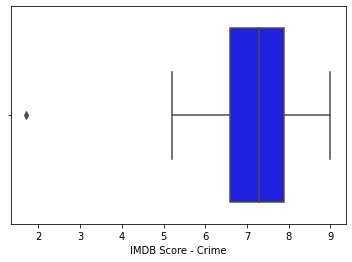

count    29.000000
mean      7.151724
std       1.371293
min       1.700000
25%       6.600000
50%       7.300000
75%       7.900000
max       9.000000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [15]:
plt.hist(anime.imdb_score[anime.Crime == 1], color = 'blue', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Crime')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime.Crime == 1], color = 'blue')
plt.xlabel('IMDB Score - Crime')
plt.show()
plt.clf()

anime.imdb_score[anime.Crime == 1].describe()

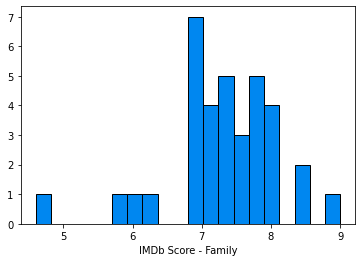

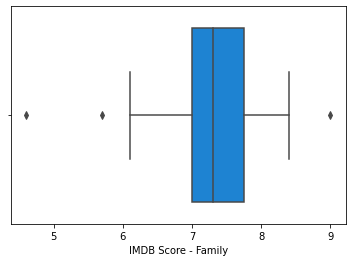

count    35.000000
mean      7.288571
std       0.798075
min       4.600000
25%       7.000000
50%       7.300000
75%       7.750000
max       9.000000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [16]:
plt.hist(anime.imdb_score[anime.Family == 1], color = '#0087F0', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Family')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime.Family == 1], color = '#0087F0')
plt.xlabel('IMDB Score - Family')
plt.show()
plt.clf()

anime.imdb_score[anime.Family == 1].describe()

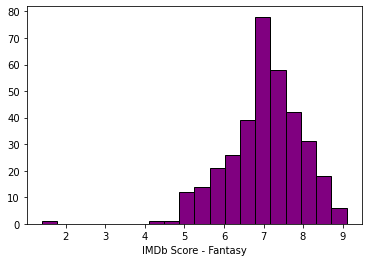

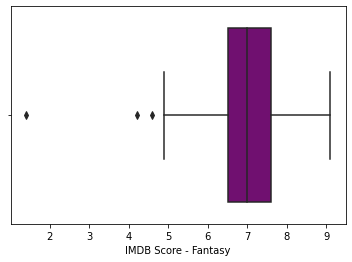

count    348.000000
mean       7.018966
std        0.934844
min        1.400000
25%        6.500000
50%        7.000000
75%        7.600000
max        9.100000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [17]:
plt.hist(anime.imdb_score[anime.Fantasy == 1], color = 'purple', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Fantasy')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime.Fantasy == 1], color = 'purple')
plt.xlabel('IMDB Score - Fantasy')
plt.show()
plt.clf()

anime.imdb_score[anime.Fantasy == 1].describe()

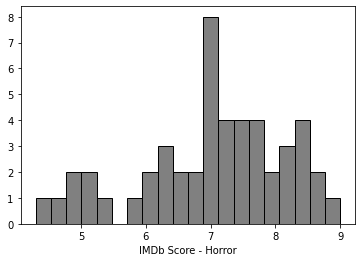

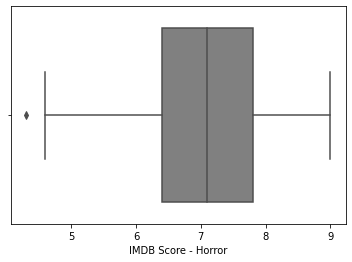

count    49.000000
mean      7.030612
std       1.137102
min       4.300000
25%       6.400000
50%       7.100000
75%       7.800000
max       9.000000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [18]:
plt.hist(anime.imdb_score[anime.Horror == 1], color = 'grey', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Horror')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime.Horror == 1], color = 'grey')
plt.xlabel('IMDB Score - Horror')
plt.show()
plt.clf()

anime.imdb_score[anime.Horror == 1].describe()

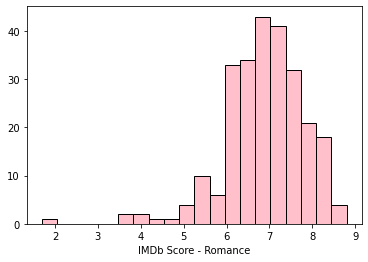

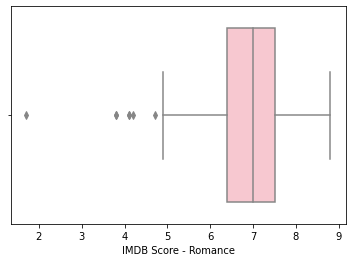

count    253.000000
mean       6.896443
std        0.940421
min        1.700000
25%        6.400000
50%        7.000000
75%        7.500000
max        8.800000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [19]:
plt.hist(anime.imdb_score[anime.Romance == 1], color = 'pink', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Romance')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime.Romance == 1], color = 'pink')
plt.xlabel('IMDB Score - Romance')
plt.show()
plt.clf()

anime.imdb_score[anime.Romance == 1].describe()

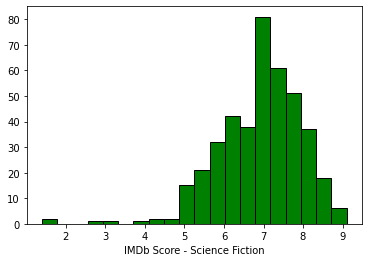

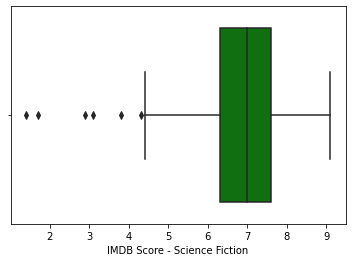

count    411.000000
mean       6.909732
std        1.039537
min        1.400000
25%        6.300000
50%        7.000000
75%        7.600000
max        9.100000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [20]:
plt.hist(anime.imdb_score[anime['Science Fiction'] == 1], color = 'green', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Science Fiction')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime['Science Fiction'] == 1], color = 'green')
plt.xlabel('IMDB Score - Science Fiction')
plt.show()
plt.clf()

anime.imdb_score[anime['Science Fiction'] == 1].describe()

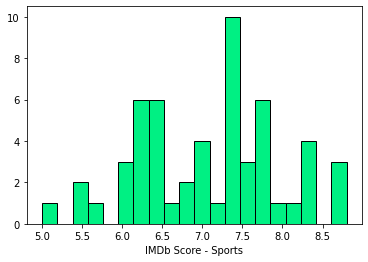

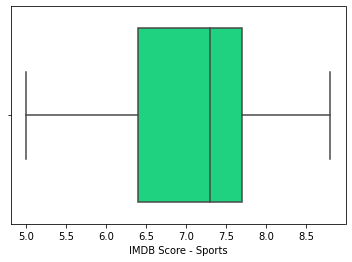

count    55.000000
mean      7.076364
std       0.899787
min       5.000000
25%       6.400000
50%       7.300000
75%       7.700000
max       8.800000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [21]:
plt.hist(anime.imdb_score[anime.Sports == 1], color = '#00F083', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Sports')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime['Sports'] == 1], color = '#00F083')
plt.xlabel('IMDB Score - Sports')
plt.show()
plt.clf()

anime.imdb_score[anime.Sports == 1].describe()

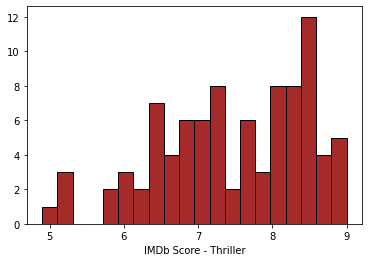

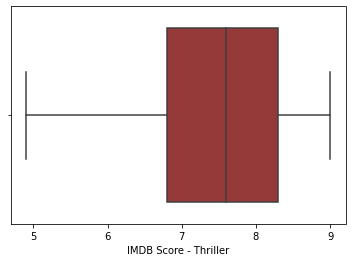

count    90.000000
mean      7.462222
std       0.976531
min       4.900000
25%       6.800000
50%       7.600000
75%       8.300000
max       9.000000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [22]:
plt.hist(anime.imdb_score[anime.Thriller == 1], color = 'brown', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Thriller')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime['Thriller'] == 1], color = 'brown')
plt.xlabel('IMDB Score - Thriller')
plt.show()
plt.clf()

anime.imdb_score[anime.Thriller == 1].describe()

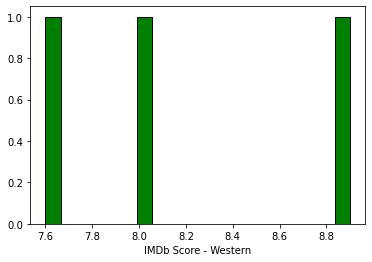

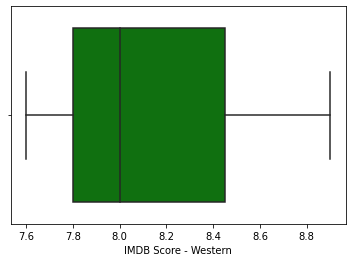

count    3.000000
mean     8.166667
std      0.665833
min      7.600000
25%      7.800000
50%      8.000000
75%      8.450000
max      8.900000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

In [23]:
plt.hist(anime.imdb_score[anime.Western == 1], color = 'green', bins = 20, edgecolor = 'black')
plt.xlabel('IMDb Score - Western')
plt.show()
plt.clf()

sns.boxplot(x = anime.imdb_score[anime['Western'] == 1], color = 'green')
plt.xlabel('IMDB Score - Western')
plt.show()
plt.clf()

anime.imdb_score[anime.Western == 1].describe()

In [25]:
# Multiple Linear Regression Model
x = anime[['seasons','Comedy', 'Crime', 'Family', 'Fantasy', 'Horror', 'Romance', 'Science Fiction', 'Sports', 'Thriller', 'Western', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG']]
y = anime.imdb_score

x = sm.add_constant(x)

est = sm.OLS(y, x).fit() 
est.summary()

C:\Users\tyler\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     11.15
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           3.21e-25
Time:                        17:38:33   Log-Likelihood:                -1218.6
No. Observations:                 906   AIC:                             2469.
Df Residuals:                     890   BIC:                             2546.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0890      0.081     75.317      0.000       5.930       6.248
seasons             0.0540      0.013      4.222      0.000       0.029       0.079
Comedy              0.1818      0.068      2.672      0.008       0.048       0.315
Crime               0.0776      0.185      0.419      0.675      -0.286       0.441
Family              0.4163      0.169      2.463      0.014       0.085       0.748
Fantasy             0.2101      0.071      2.943      0.003       0.070       0.350
Horror              0.0044      0.148      0.030      0.976      -0.287       0.295
Romance             0.0875      0.071      1.225      0.221      -0.053       0.228
Science Fiction     0.0748      0.071      1.050      0.294      -0.065       0.214
Sports              0.4203      0.136      3.095      0.002       0.154       0.687
Thriller            0.6200      0.115      5.411      0.000       0.395       0.845
Western             0.8679      0.550      1.579      0.115      -0.211       1.947
TV-14               0.4332      0.077      5.609      0.000       0.282       0.585
TV-G                0.4670      0.274      1.704      0.089      -0.071       1.005
TV-MA               0.2387      0.111      2.159      0.031       0.022       0.456
TV-PG               0.4760      0.110      4.324      0.000       0.260       0.692
==============================================================================
Omnibus:                      140.730   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.860
Skew:                          -0.848   Prob(JB):                     1.43e-72
Kurtosis:                       5.426   Cond. No.                         57.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""